  ## 데이터분석


  -----------
  

  #### 김하연

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family= 'Malgun Gothic')  # 한글깨짐방지 두줄(Windows).
# plt.rc('font',family= 'AppleGothic')    # 한글깨짐방지 두줄(Mac).
plt.rc('axes',unicode_minus=False)

In [2]:
df = pd.read_csv('상권데이터_전처리_latest.csv',encoding='cp949')
df.head()

,상권구분,상권코드,상권명,서비스업종,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,구,위도,경도
0,관광특구,1001495,잠실 관광특구,인테리어,228000000,853,45,55,0,11,...,7,148,123,382,86,59,12,송파구,37.504832,127.088065
1,관광특구,1001495,잠실 관광특구,가전제품,2658333555,7144,92,8,8,8,...,0,376,1504,1128,752,1128,19,송파구,37.504832,127.088065
2,관광특구,1001495,잠실 관광특구,가구,115663180,142,60,40,8,5,...,0,0,57,28,28,19,15,송파구,37.504832,127.088065
3,관광특구,1001495,잠실 관광특구,화초,35678858,1305,76,24,7,8,...,0,296,267,297,148,237,16,송파구,37.504832,127.088065
4,관광특구,1001495,잠실 관광특구,완구,2042276555,18708,67,33,6,39,...,0,3988,4467,7735,1499,1019,8,송파구,37.504832,127.088065


In [3]:
df_sample=df.sample(1000)
df_sample.head()

,상권구분,상권코드,상권명,서비스업종,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,구,위도,경도
103000,골목상권,1000608,화곡로64길,의료기기,142541720,411,50,50,0,0,...,0,0,0,103,0,308,3,강서구,37.556250,126.856325
59927,전통시장,1001338,돈암제일시장,슈퍼마켓,606270444,60692,70,30,14,14,...,347,7230,8142,15355,14436,15182,8,성북구,37.591736,127.015947
96052,골목상권,1000943,백제고분로21길,PC방,178694084,41158,69,32,15,13,...,4739,23710,7633,2500,2425,151,1,송파구,37.505638,127.090825
9590,골목상권,1000940,거마로20길,안경,41059521,467,80,20,23,19,...,20,39,77,217,67,29,1,송파구,37.496990,127.149454
20881,골목상권,1000393,갈현로7길,피부관리실,7247059,178,60,40,28,3,...,0,0,84,94,0,0,3,은평구,37.603917,126.908476


## 상권의 점포수 세기

In [4]:
df_sang=df.groupby('상권명').sum()
jumpo_number=df_sang['점포수'].sort_values(ascending=False)
jumpo_number

상권명
동대문패션타운 관광특구              52016
명동 남대문 북창동 다동 무교동 관광특구    32248
종로?청계 관광특구                20211
홍익대학교 주변                  14799
남대문시장                     13929
                          ...  
합정시장                         17
등마루시장                        15
논현종합시장                       12
상계시장                          8
유영시장                          4
Name: 점포수, Length: 1322, dtype: int64

In [5]:
jumpo_number.head(15)

상권명
동대문패션타운 관광특구              52016
명동 남대문 북창동 다동 무교동 관광특구    32248
종로?청계 관광특구                20211
홍익대학교 주변                  14799
남대문시장                     13929
서울 서초구 강남역                 8103
가산디지털단지역_3                 8015
잠실 관광특구                    7775
서울 중구 신당역_2                7700
평화시장                       7291
이태원 관광특구                   6275
동평화시장                      6269
구로디지탈1단지                   5833
서울 강동구 천호역_2               5448
용산 전자상가_1                  5354
Name: 점포수, dtype: int64

<AxesSubplot:xlabel='상권명'>

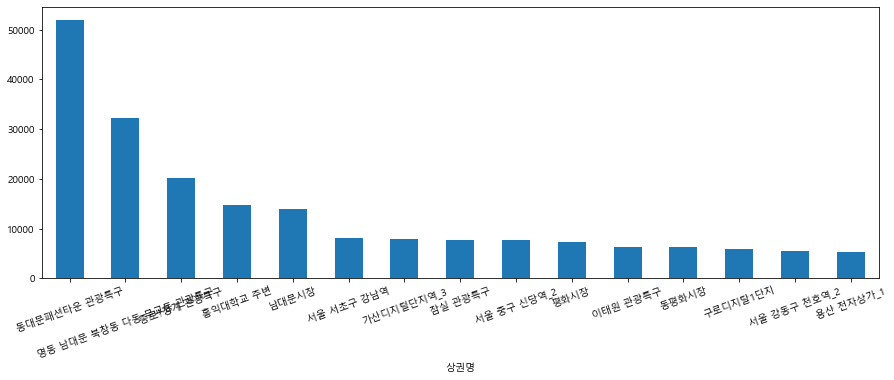

In [6]:
plt.figure(figsize=(15,5))
jumpo_number.head(15).plot.bar(rot=20,)

<AxesSubplot:ylabel='상권명'>

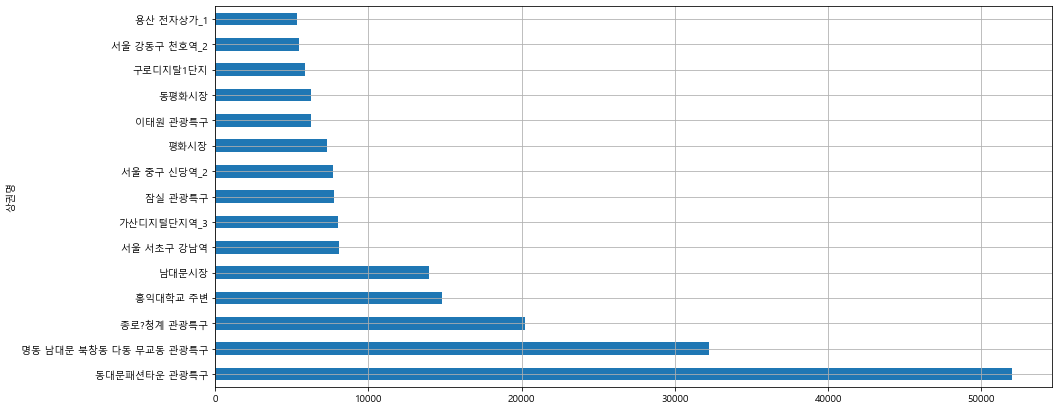

In [7]:
plt.figure(figsize=(15,7))
jumpo_number.head(15).plot.barh(grid=True)

## 상권당 분기별 매출금액

In [8]:
df_sang['분기당_매출_금액'].sort_values(ascending=False).head(15)

상권명
용산 전자상가_1                 2063393455880
용산 전자상가_2                 1868491015415
명동 남대문 북창동 다동 무교동 관광특구    1374959292839
서울 동작구 노량진1동_1            1263919134580
가락시장                      1238940864675
종로?청계 관광특구                 952259318256
동대문패션타운 관광특구               900581813177
용산 전자상가_5                  859932447202
가산디지털단지역_3                 791035084458
홍익대학교 주변                   790109988781
독산동 우시장                    753179334325
마포농수산물시장                   746284703965
서울 서초구 강남역                 743306893249
코엑스                        645469626637
잠실 관광특구                    624689931100
Name: 분기당_매출_금액, dtype: int64

<AxesSubplot:xlabel='상권명'>

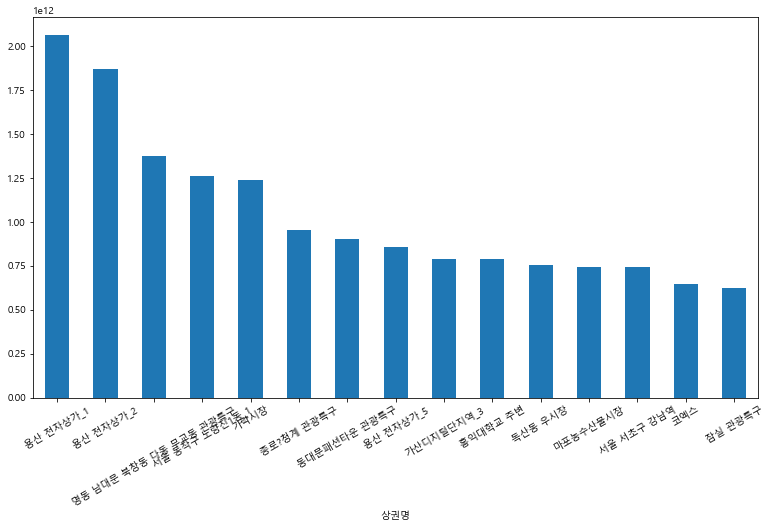

In [9]:
df_sang['분기당_매출_금액'].sort_values(ascending=False).head(15).plot.bar(rot=30,figsize=(13,7))

<AxesSubplot:ylabel='분기당_매출_금액'>

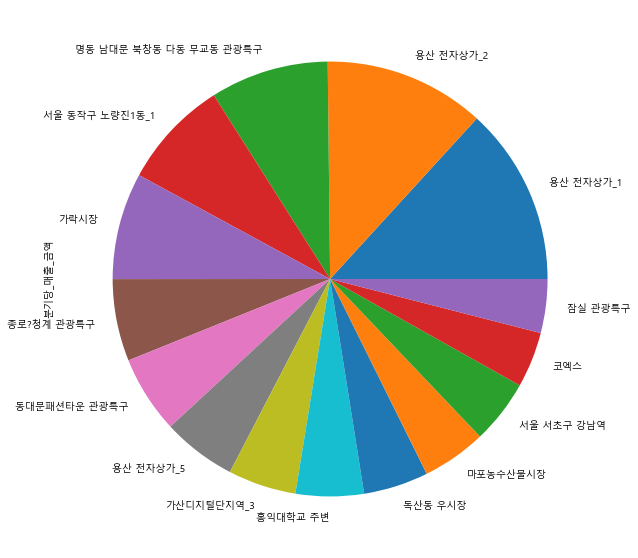

In [10]:
df_sang['분기당_매출_금액'].sort_values(ascending=False).head(15).plot.pie(rot=30,figsize=(10,10))

## 연령대별 매출 건수

In [11]:
df_sang[['연령대_10_매출_건수','연령대_20_매출_건수','연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수']]

,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수
상권명,,,,,
가락시장,20888,1786362,4320720,4777441,4986251
가로공원로58길,1471,42351,44944,34853,36135
가로공원로76가길,3366,150115,200387,117506,75699
가로공원로80길,4861,115902,162220,139929,101481
가리봉시장,1685,44138,126774,193587,181659
...,...,...,...,...,...
휘경로2길,77077,1620123,546263,409264,474016
휘경로3길,36214,625899,210166,174035,203657
흑석로13길,7108,177536,82398,71279,71881


In [12]:
te_sale=df['연령대_10_매출_건수'].sum()
tw_sale=df['연령대_20_매출_건수'].sum()
th_sale=df['연령대_30_매출_건수'].sum()
fo_sale=df['연령대_40_매출_건수'].sum()
fi_sale=df['연령대_50_매출_건수'].sum()

In [13]:
age_sales=pd.Series({'10대':te_sale,'20대':tw_sale,'30대':th_sale,'40대':fo_sale,'50대':fi_sale})
age_sales

10대     36012450
20대    567118552
30대    517595148
40대    436316421
50대    376684072
dtype: int64

In [14]:
age_sales2 = { 'Age' : ['10대', '20대', '30대', '40대','50대'], 'Sale':[te_sale,tw_sale,th_sale,fo_sale,fi_sale]}
age_sale_df = pd.DataFrame(age_sales2)
age_sale_df

,Age,Sale
0,10대,36012450
1,20대,567118552
2,30대,517595148
3,40대,436316421
4,50대,376684072


In [15]:
age_nor=age_sale_df
age_nor

,Age,Sale
0,10대,36012450
1,20대,567118552
2,30대,517595148
3,40대,436316421
4,50대,376684072


<AxesSubplot:xlabel='Age', ylabel='Sale'>

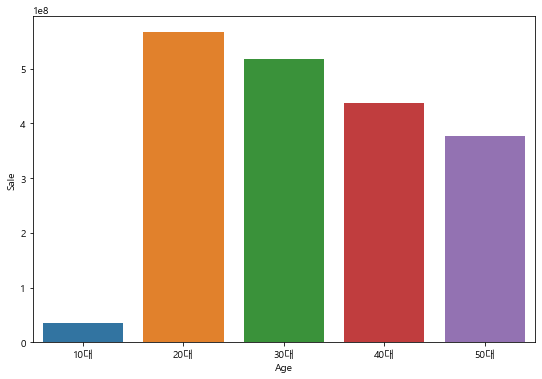

In [16]:

# age_sales.plot.bar()
plt.figure(figsize=(9,6))
sns.barplot(x='Age',y='Sale',data=age_nor)

<AxesSubplot:ylabel='None'>

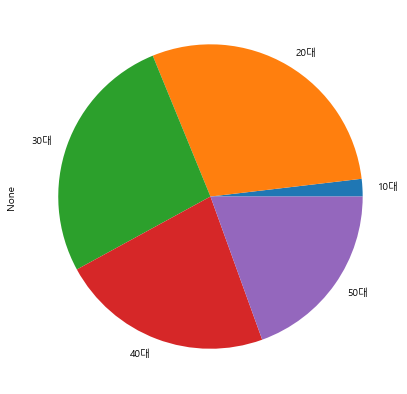

In [17]:
age_sales.plot.pie(figsize=(7,7))

In [18]:
jamsil=df[df['상권명']=='잠실 관광특구']['점포수']
jamsil

0         12
1         19
2         15
3         16
4          8
        ... 
86506     39
86507     71
86508     41
86509     21
86510    245
Name: 점포수, Length: 174, dtype: int64

In [19]:
jamsil.sum()

7775

## 상권명 개수 (중복값제외)

In [20]:
sang_list=df['상권명'].unique().tolist()

In [21]:
len(sang_list)

1322

## 업종별명 개수 (중복값제외)

In [22]:
df['서비스업종']

0          인테리어
1          가전제품
2            가구
3            화초
4            완구
          ...  
115475      제과점
115476    양식음식점
115477    일식음식점
115478    중식음식점
115479    한식음식점
Name: 서비스업종, Length: 115480, dtype: object

In [23]:
df_service_number=df['서비스업종'].unique()
df_service_number

array(['인테리어', '가전제품', '가구', '화초', '완구', '운동/경기용품', '화장품', '문구', '의료기기',
       '의약품', '시계및귀금속', '안경', '가방', '일반의류', '육류판매', '컴퓨터및주변장치판매', '편의점',
       '슈퍼마켓', '노래방', '고시원', '여관', '세탁소', '피부관리실', '미용실', '자동차수리',
       '스포츠클럽', 'PC방', '골프연습장', '당구장', '한의원', '치과의원', '일반의원', '스포츠 강습',
       '커피-음료', '호프-간이주점', '분식전문점', '치킨전문점', '패스트푸드점', '제과점', '양식음식점',
       '일식음식점', '중식음식점', '한식음식점', '전자상거래업', '조명용품', '철물점', '애완동물', '섬유제품',
       '서적', '신발', '반찬가게', '청과상', '수산물판매', '미곡판매', '핸드폰', '가전제품수리', '네일숍',
       '예술학원', '외국어학원', '일반교습학원', '자동차미용', '자전거 및 기타운송장비', '부동산중개업'],
      dtype=object)

In [24]:
len(df_service_number)

63

In [25]:
df_service=df.groupby('서비스업종').sum()
df_service.head()

,상권코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,위도,경도
서비스업종,,,,,,,,,,,,,,,,,,,,,
PC방,1386006161,292026806042,60783226,91900,46728,18206,18052,18380,17855,19702,...,10698525,6076938,38502227,9719549,3202274,2728039,545404,3224,51998.027131,175878.979224
가구,683562842,646400653864,1317727,48714,19633,9503,9394,10046,10323,9532,...,634225,5126,102102,221329,288083,323182,259262,3674,25636.974278,86735.286254
가방,352337311,135970736664,1781354,25187,10039,4438,5003,5225,5272,5301,...,1164566,27356,429178,379196,301634,318190,296076,5059,13215.059472,44699.681189
가전제품,463353108,1156621592603,3111126,37499,8835,8232,6651,8027,7628,7021,...,1262259,6854,274985,606718,733986,749615,630628,4670,17381.731134,58794.545568
가전제품수리,445271545,38193098753,486874,37645,6881,7280,8233,7247,8149,6784,...,176532,1002,36139,73572,107057,103473,109097,1290,16709.935273,56505.690274


## 업종별 점포수

In [26]:
service_jumpo_num=df_service['점포수'].sort_values(ascending=False)
service_jumpo_num

서비스업종
일반의류            151998
한식음식점           123003
커피-음료            42590
미용실              40976
분식전문점            33884
                 ...  
가전제품수리            1290
완구                 824
자동차미용              763
고시원                454
자전거 및 기타운송장비       113
Name: 점포수, Length: 63, dtype: int64

<AxesSubplot:xlabel='서비스업종'>

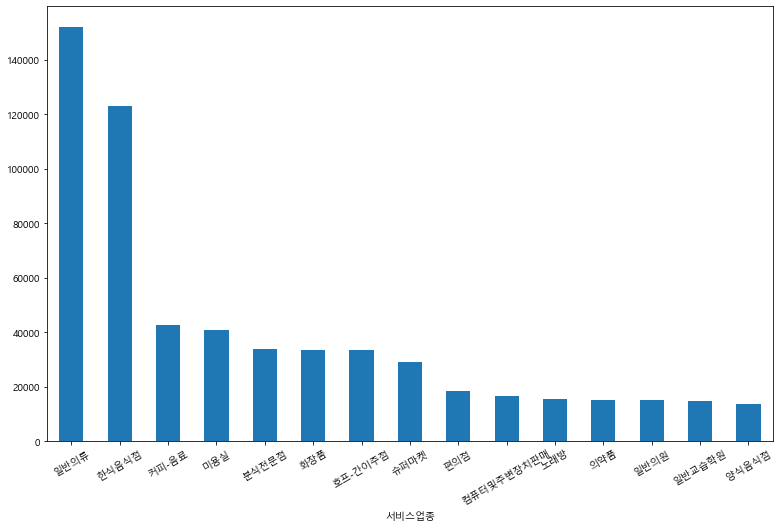

In [27]:
service_jumpo_head=service_jumpo_num.head(15)
service_jumpo_head.plot.bar(rot=30,figsize=(13,8))

<AxesSubplot:ylabel='점포수'>

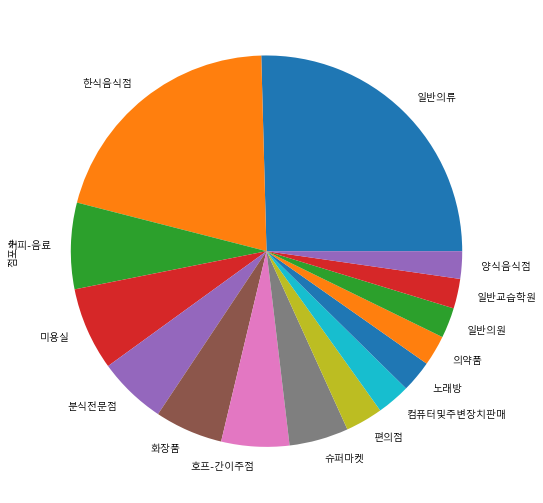

In [28]:
plt.figure(figsize=(15,9))
service_jumpo_num.head(15).plot.pie(rot=30)

<AxesSubplot:xlabel='서비스업종', ylabel='점포수'>

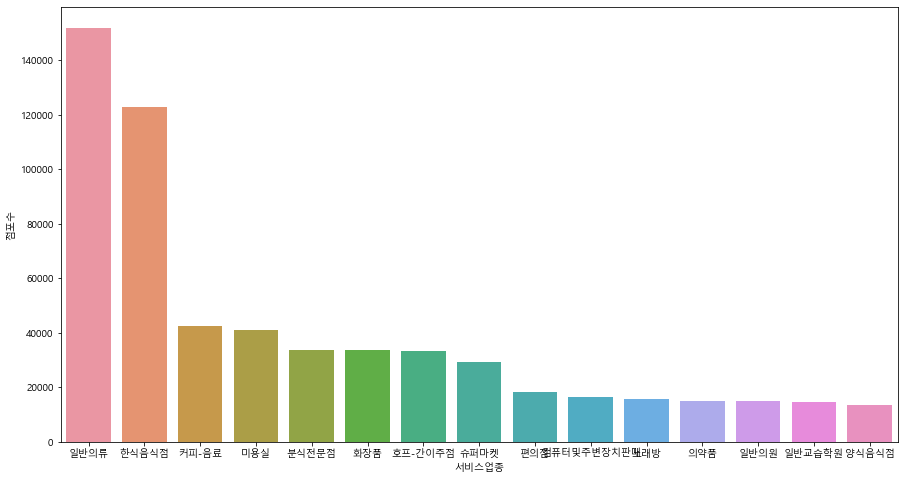

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x='서비스업종',y='점포수',data=service_jumpo_head.reset_index())

<AxesSubplot:xlabel='점포수', ylabel='서비스업종'>

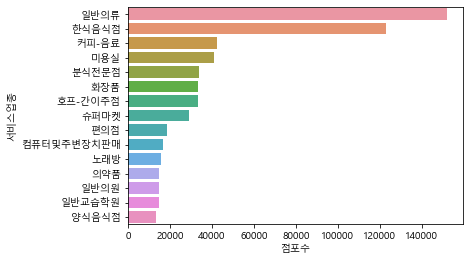

In [30]:
sns.barplot(x='점포수',y='서비스업종',data=service_jumpo_head.reset_index())

# sns.countplot(data=df_seoul, x='시군구명')

## 구별 점포수

In [31]:
df_gu=df.groupby('구').sum()
df_gu.head(5)

,상권코드,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,...,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,위도,경도
구,,,,,,,,,,,,,,,,,,,,,
강남구,10230479491,8808025020954,323721327,833367,189516,161987,168103,166054,168834,170259,...,137811364,5048122,88229662,85034169,61283185,41399433,22082143,102031,383322.645639,1.298408e+06
강동구,5552884348,1934127559124,93914929,424480,130669,85968,85202,83746,83166,87340,...,44269544,1474634,19693794,19041152,19046508,18106659,15140986,33314,208244.538878,7.052272e+05
강북구,3534926370,800831467762,41055139,265745,87877,54451,52220,52959,52329,54364,...,18316590,571336,7906930,7567256,8655168,8516411,7340968,16400,132948.559626,4.487809e+05
강서구,5942108179,1553448292196,77026935,458411,135896,91291,93385,90751,91006,93077,...,32681903,1276761,16218234,17956889,16704201,13515094,10010159,28783,222956.363725,7.531942e+05
관악구,6506020690,1715518885387,117774793,487891,162669,97987,96645,97076,96942,100435,...,48210334,2019681,40047358,27062408,17982901,17315320,12657489,33119,243617.301185,8.250967e+05


In [32]:
df_gu_jum=df_gu['점포수'].sort_values(ascending=False).head(15)
df_gu_jum

구
중구      153442
강남구     102031
종로구      56915
마포구      42105
용산구      41805
송파구      38801
영등포구     33774
강동구      33314
구로구      33302
관악구      33119
서초구      30815
강서구      28783
광진구      26594
동대문구     26047
금천구      24357
Name: 점포수, dtype: int64

<AxesSubplot:xlabel='구'>

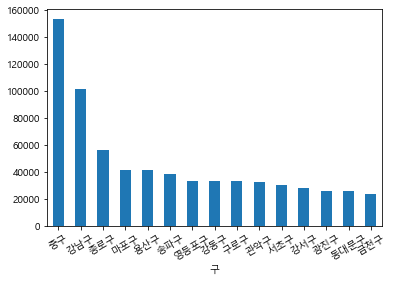

In [33]:
df_gu_jum.plot.bar(rot=30)

<AxesSubplot:ylabel='구'>

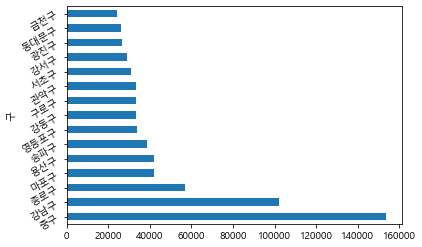

In [34]:
df_gu_jum.plot.barh(rot=30)

<AxesSubplot:ylabel='Density'>

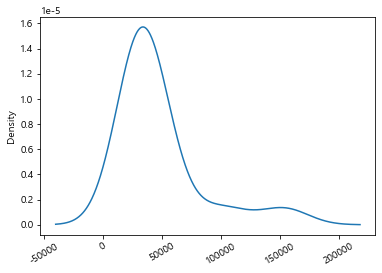

In [35]:
df_gu_jum.plot.density(rot=30)

<AxesSubplot:ylabel='점포수'>

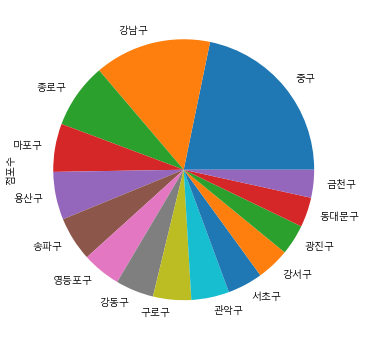

In [36]:
df_gu_jum.plot.pie(rot=30,figsize=(6,6))

# 지도 시각화

<AxesSubplot:xlabel='경도', ylabel='위도'>

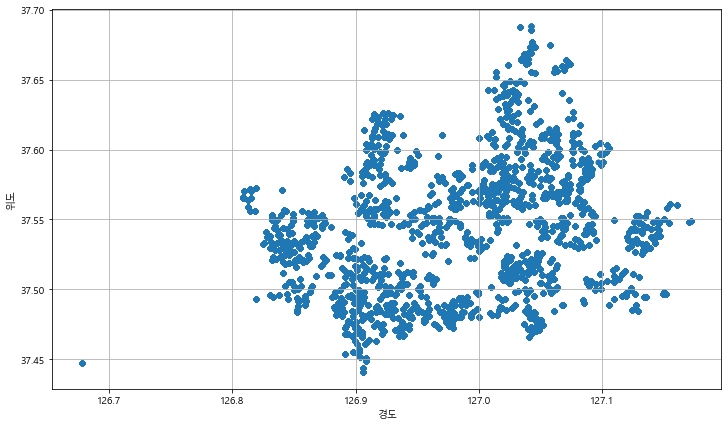

In [37]:
df[['경도','위도','구']].plot.scatter(x='경도',y='위도',figsize=(12,7),grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

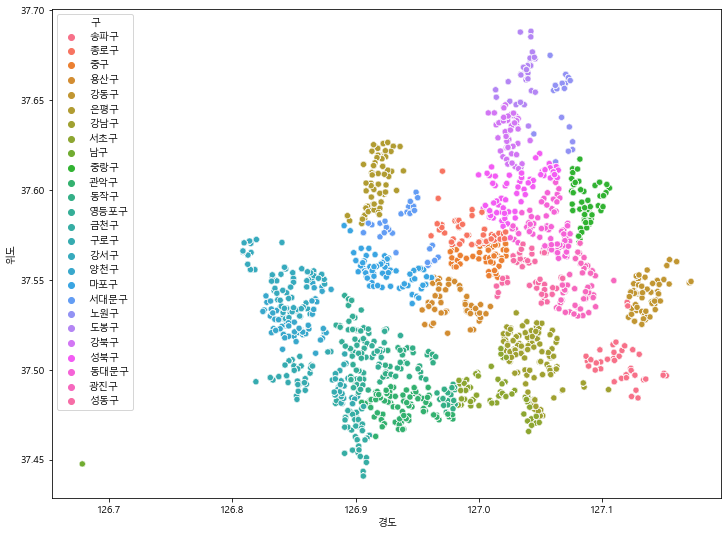

In [38]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=df, x="경도",y='위도',hue='구')

<AxesSubplot:xlabel='경도', ylabel='위도'>

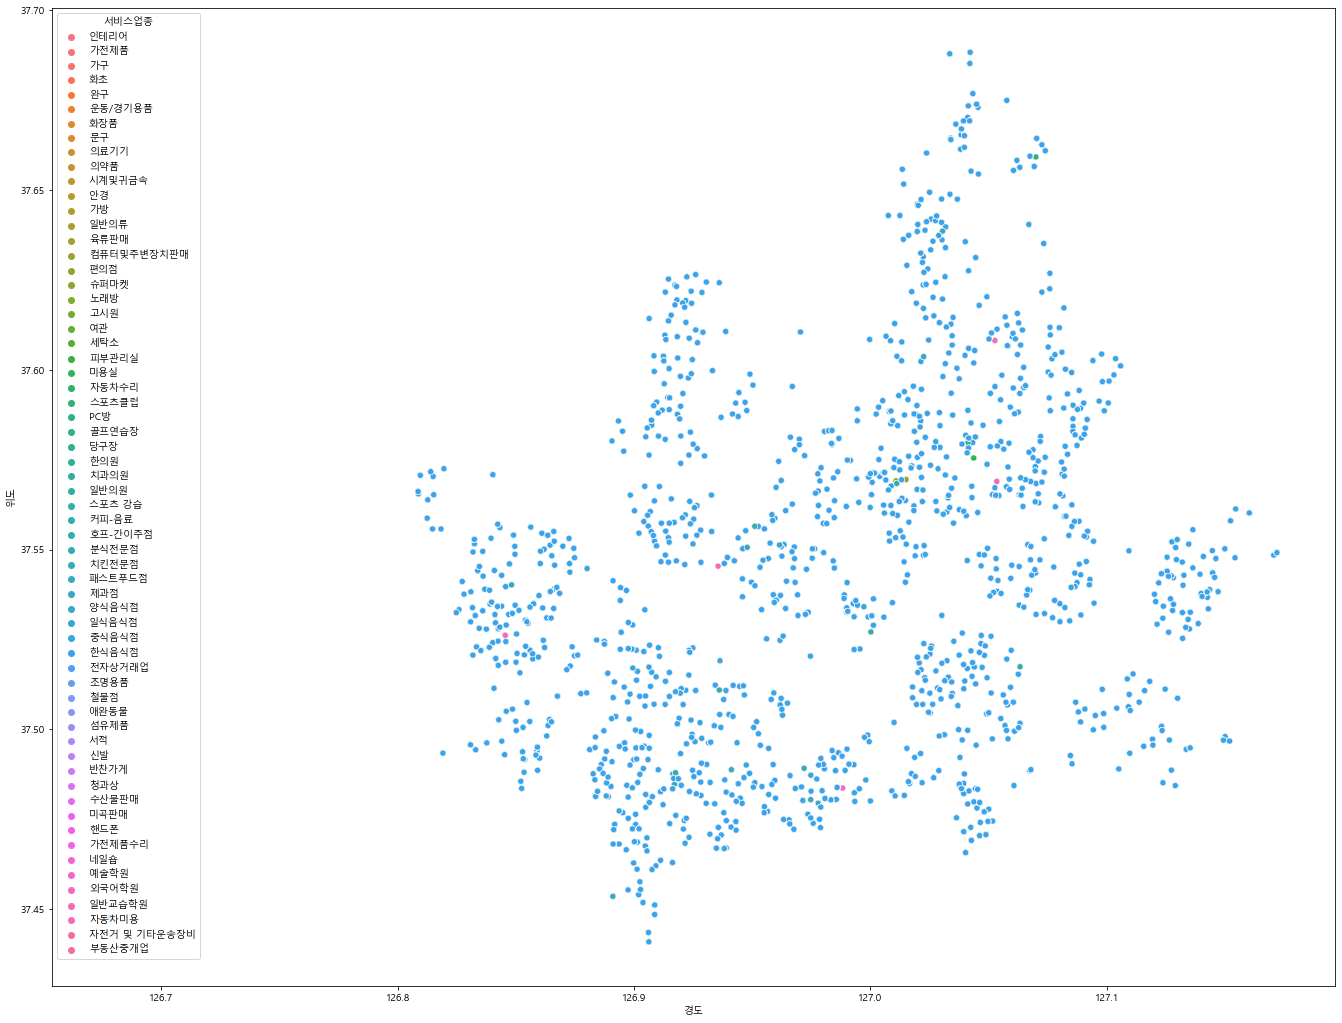

In [39]:
plt.figure(figsize=(23,18))
sns.scatterplot(data=df, x="경도",y='위도',hue='서비스업종')

In [40]:
import folium
df['위도'].mean() #위도의 평균값
df['경도'].mean() #경도

126.98808113196029

In [41]:
map=folium.Map(location=[df_sample['위도'].mean(),df_sample['경도'].mean()],zoom_start=12)


for n in df_sample.index:
    name=df_sample.loc[n,'서비스업종']
    
    location=[df_sample.loc[n,'위도'], df_sample.loc[n,'경도']]
    adress=df_sample.loc[n,'구']
    popup=f'{name}-{adress}'

    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)
map

# -끝